In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import skfuzzy as fuzz

In [2]:
def show_image(image): 
    img = mpimg.imread(image)
    plt.axis('off')
    plt.imshow(img)

# 1. Determine the input and output variables + Membership
Terdapat dua input variable (crisp value): BMI dan BodyFat %

## - BMI linguistics & Memberships

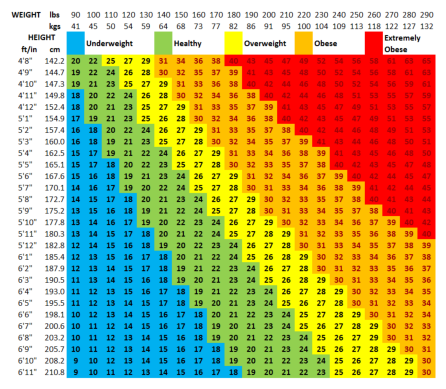

In [3]:
show_image('./assets/bmi-chart_1.png')

Berdasarkan chart BMI tersebut, kategori BMI secara umum dapat ditentukan sebagai

1. **Underweight**:  
$$
\text{Underweight}(x) = 
\begin{cases}
1 & \text{if } x \leq 18.5 \\
\frac{25 - x}{6.5} & \text{if } 18.5 < x \leq 25 \\
0 & \text{otherwise}
\end{cases}
$$

2. **Normal (Healthy)**:  
$$
\text{Normal}(x) = 
\begin{cases}
1 & \text{if } 18.5 \leq x \leq 25 \\
\frac{30 - x}{5} & \text{if } 25 < x \leq 30 \\
0 & \text{otherwise}
\end{cases}
$$

3. **Overweight**:  
$$
\text{Overweight}(x) = 
\begin{cases}
\frac{x - 25}{5} & \text{if } 25 \leq x \leq 30 \\
\frac{35 - x}{5} & \text{if } 30 < x \leq 35 \\
0 & \text{otherwise}
\end{cases}
$$

4. **Obese**:  
$$
\text{Obese}(x) = 
\begin{cases}
\frac{x - 30}{5} & \text{if } 30 \leq x \leq 35 \\
1 & \text{if } x \geq 35 \\
0 & \text{otherwise}
\end{cases}
$$

In [154]:
def bmi_underweight(bmi):
    # Equivalent to fuzz.trapmf(x_bmi, [0, 0, 17, 18.5])
    if bmi <= 0:
        return 1
    elif 0 < bmi < 17:
        return 1
    elif 17 <= bmi < 18.5:
        return (18.5 - bmi) / (18.5 - 17)
    else:
        return 0

def bmi_normal(bmi):
    # Equivalent to fuzz.trapmf(x_bmi, [17, 18.5, 23, 24.9])
    if bmi < 17:
        return 0
    elif 17 <= bmi < 18.5:
        return (bmi - 17) / (18.5 - 17)
    elif 18.5 <= bmi < 23:
        return 1
    elif 23 <= bmi < 24.9:
        return (24.9 - bmi) / (24.9 - 23)
    else:
        return 0

def bmi_overweight(bmi):
    # Equivalent to fuzz.trapmf(x_bmi, [23, 25, 28, 29.9])
    if bmi < 23:
        return 0
    elif 23 <= bmi < 25:
        return (bmi - 23) / (25 - 23)
    elif 25 <= bmi < 28:
        return 1
    elif 28 <= bmi < 29.9:
        return (29.9 - bmi) / (29.9 - 28)
    else:
        return 0

def bmi_obese(bmi):
    # Equivalent to fuzz.trapmf(x_bmi, [28, 30, 40, 40])
    if bmi < 28:
        return 0
    elif 28 <= bmi < 30:
        return (bmi - 28) / (30 - 28)
    elif 30 <= bmi <= 40:
        return 1
    else:
        return 0

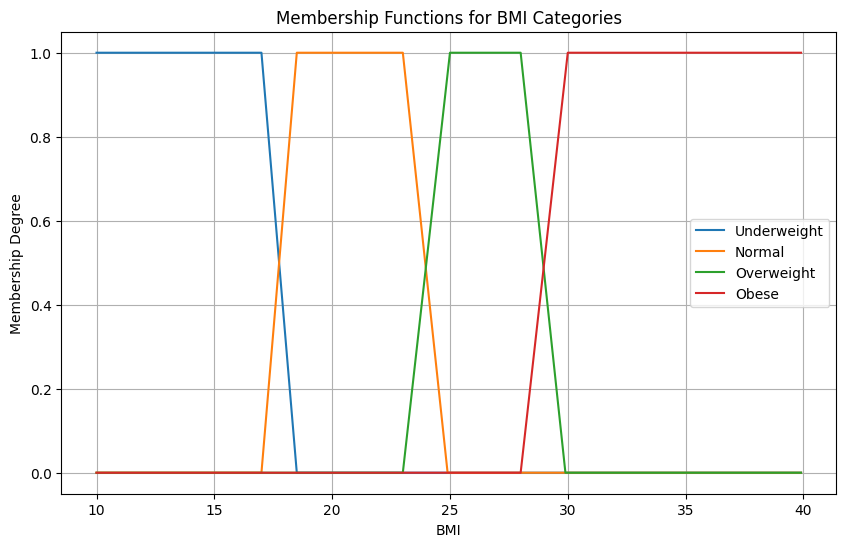

In [155]:
# plot the membership functions
x_bmi = np.arange(10, 40, 0.1)

underweight = [bmi_underweight(x) for x in x_bmi]
normal = [bmi_normal(x) for x in x_bmi]
overweight = [bmi_overweight(x) for x in x_bmi]
obese = [bmi_obese(x) for x in x_bmi]

# Plot the membership functions
plt.figure(figsize=(10, 6))
plt.plot(x_bmi, underweight, label='Underweight')
plt.plot(x_bmi, normal, label='Normal')
plt.plot(x_bmi, overweight, label='Overweight')
plt.plot(x_bmi, obese, label='Obese')

plt.title('Membership Functions for BMI Categories')
plt.xlabel('BMI')
plt.ylabel('Membership Degree')
plt.legend()
plt.grid(True)
plt.show()

## - BodyFat % linguistics (women) & Memberships

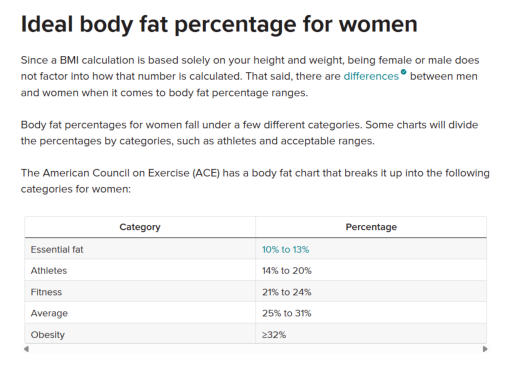

In [6]:
show_image("./assets/bf-women.png")

Berdasarkan data tersebut, kita dapat memodelkan fungsi keanggotaannya sebagai berikut 

1. **Essential**:  
$$
\text{Essential}(x) = 
\begin{cases}
1 & \text{if } x \leq 10 \\
\frac{13 - x}{3} & \text{if } 10 < x \leq 13 \\
0 & \text{otherwise}
\end{cases}
$$

2. **Athletes**:  
$$
\text{Athletes}(x) = 
\begin{cases}
\frac{x - 14}{3} & \text{if } 14 \leq x \leq 17 \\
1 & \text{if } 17 \leq x \leq 20 \\
\frac{22 - x}{2} & \text{if } 20 < x \leq 22 \\
0 & \text{otherwise}
\end{cases}
$$

3. **Fitness**:  
$$
\text{Fitness}(x) = 
\begin{cases}
\frac{x - 21}{1} & \text{if } 21 \leq x \leq 22 \\
1 & \text{if } 22 \leq x \leq 24 \\
\frac{25 - x}{1} & \text{if } 24 < x \leq 25 \\
0 & \text{otherwise}
\end{cases}
$$

4. **Average**:  
$$
\text{Average}(x) = 
\begin{cases}
\frac{x - 25}{2} & \text{if } 25 \leq x \leq 27 \\
1 & \text{if } 27 \leq x \leq 31 \\
\frac{32 - x}{1} & \text{if } 31 < x \leq 32 \\
0 & \text{otherwise}
\end{cases}
$$

5. **Obese**:  
$$
\text{Obese}(x) = 
\begin{cases}
\frac{x - 31}{1} & \text{if } 31 < x \leq 32 \\
1 & \text{if } x \geq 32 \\
0 & \text{otherwise}
\end{cases}
$$

In [7]:
def bfw_essential(bodyfat):
    if bodyfat <= 10:
        return 1
    elif 10 < bodyfat <= 14:
        return (14 - bodyfat) / (14 - 10)
    else:
        return 0

def bfw_athletes(bodyfat):
    if 13 < bodyfat <= 17:
        return (bodyfat - 13) / (17 - 13)
    elif 17 <= bodyfat <= 20:
        return 1
    elif 20 < bodyfat <= 22:
        return (22 - bodyfat) / (22 - 20)
    else:
        return 0

def bfw_fitness(bodyfat):
    if 21 <= bodyfat <= 22:
        return (bodyfat - 21) / (22 - 21)
    elif 22 <= bodyfat <= 24:
        return 1
    elif 24 < bodyfat <= 25:
        return (25 - bodyfat) / (25 - 24)
    else:
        return 0

def bfw_average(bodyfat):
    if 24 < bodyfat <= 27:
        return (bodyfat - 24) / (27 - 24)
    elif 27 <= bodyfat <= 31:
        return 1
    elif 31 < bodyfat <= 32:
        return (32 - bodyfat) / (32 - 31)
    else:
        return 0

def bfw_obese(bodyfat):
    if bodyfat >= 32:
        return 1
    elif 31 < bodyfat <= 32:
        return (bodyfat - 31) / (32 - 31)
    else:
        return 0

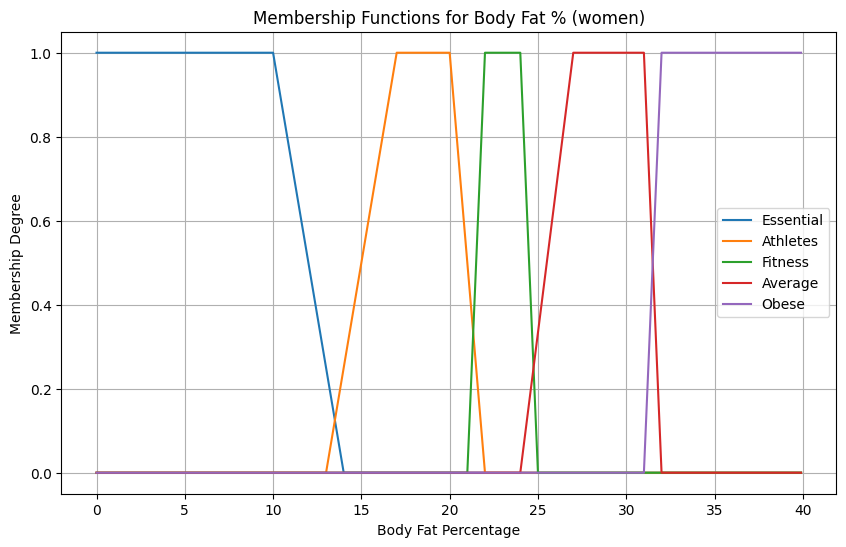

In [8]:
x_bf = np.arange(0, 40, 0.1) # range of discourse 

essential = [bfw_essential(x) for x in x_bf]
athletes = [bfw_athletes(x) for x in x_bf]
fitness = [bfw_fitness(x) for x in x_bf]
average = [bfw_average(x) for x in x_bf]
obese = [bfw_obese(x) for x in x_bf]

plt.figure(figsize=(10, 6))
plt.plot(x_bf, essential, label='Essential')
plt.plot(x_bf, athletes, label='Athletes')
plt.plot(x_bf, fitness, label='Fitness')
plt.plot(x_bf, average, label='Average')
plt.plot(x_bf, obese, label='Obese')

plt.title('Membership Functions for Body Fat % (women)')
plt.xlabel('Body Fat Percentage')
plt.ylabel('Membership Degree')
plt.legend()
plt.grid(True)
plt.show()

## - BodyFat % linguistic (men) & Memberships

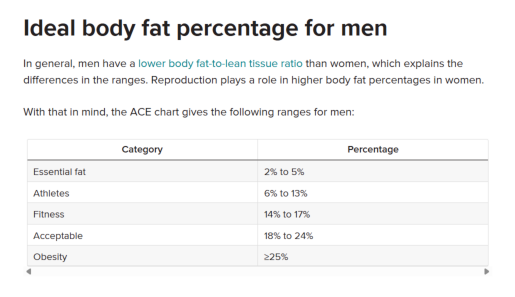

In [9]:
show_image('./assets/bf-men.png')

Berdasarkan data tersebut, kita dapat memodelkan fungsi keanggotaannya sebagai berikut 

1. **Essential**:  
$$
\text{Essential}(x) = 
\begin{cases}
1 & \text{if } x \leq 2 \\
\frac{5 - x}{3} & \text{if } 2 < x \leq 5 \\
0 & \text{otherwise}
\end{cases}
$$

2. **Athletes**:  
$$
\text{Athletes}(x) = 
\begin{cases}
\frac{x - 6}{3} & \text{if } 6 \leq x \leq 9 \\
1 & \text{if } 9 \leq x \leq 13 \\
\frac{15 - x}{2} & \text{if } 13 < x \leq 15 \\
0 & \text{otherwise}
\end{cases}
$$

3. **Fitness**:  
$$
\text{Fitness}(x) = 
\begin{cases}
\frac{x - 14}{1} & \text{if } 14 \leq x \leq 15 \\
1 & \text{if } 15 \leq x \leq 17 \\
\frac{18 - x}{1} & \text{if } 17 < x \leq 18 \\
0 & \text{otherwise}
\end{cases}
$$

4. **Acceptable**:  
$$
\text{Average}(x) = 
\begin{cases}
\frac{x - 18}{2} & \text{if } 18 \leq x \leq 20 \\
1 & \text{if } 20 \leq x \leq 24 \\
\frac{25 - x}{1} & \text{if } 24 < x \leq 25 \\
0 & \text{otherwise}
\end{cases}
$$

5. **Obese**:  
$$
\text{Obese}(x) = 
\begin{cases}
\frac{x - 24}{1} & \text{if } 24 < x \leq 25 \\
1 & \text{if } x \geq 25 \\
0 & \text{otherwise}
\end{cases}
$$

In [10]:
def bfm_essential(bodyfat):
    if bodyfat <= 2:
        return 1
    elif 2 < bodyfat <= 6:
        return (6 - bodyfat) / (6 - 2)
    else:
        return 0

def bfm_athletes(bodyfat):
    if 5 < bodyfat <= 9:
        return (bodyfat - 5) / (9 - 5)
    elif 9 <= bodyfat <= 13:
        return 1
    elif 13 < bodyfat <= 15:
        return (15 - bodyfat) / (15 - 13)
    else:
        return 0

def bfm_fitness(bodyfat):
    if 14 <= bodyfat <= 15:
        return (bodyfat - 14) / (15 - 14)
    elif 15 <= bodyfat <= 17:
        return 1
    elif 17 < bodyfat <= 18:
        return (18 - bodyfat) / (18 - 17)
    else:
        return 0

def bfm_average(bodyfat):
    if 17 < bodyfat <= 20:
        return (bodyfat - 17) / (20 - 17)
    elif 20 <= bodyfat <= 24:
        return 1
    elif 24 < bodyfat <= 25:
        return (25 - bodyfat) / (25 - 24)
    else:
        return 0

def bfm_obese(bodyfat):
    if bodyfat >= 25:
        return 1
    elif 24 < bodyfat <= 25:
        return (bodyfat - 24) / (25 - 24)
    else:
        return 0

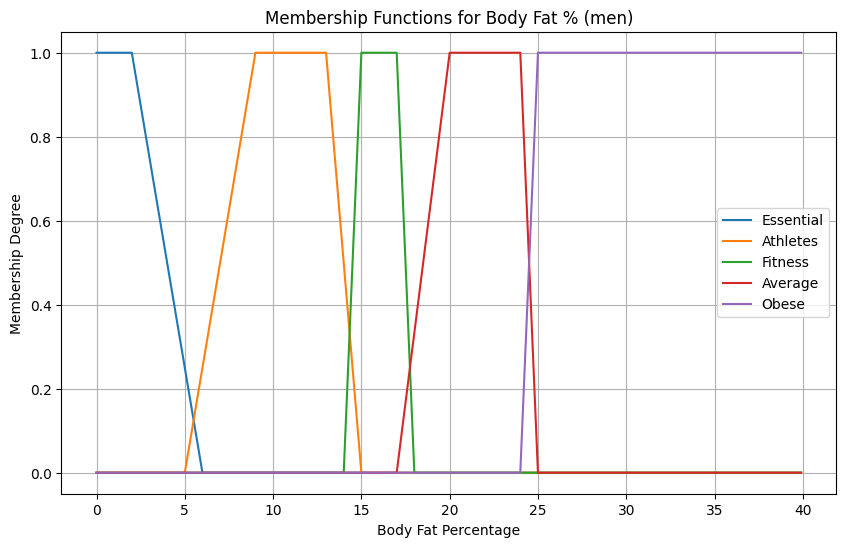

In [11]:
essential = [bfm_essential(x) for x in x_bf]
athletes = [bfm_athletes(x) for x in x_bf]
fitness = [bfm_fitness(x) for x in x_bf]
average = [bfm_average(x) for x in x_bf]
obese = [bfm_obese(x) for x in x_bf]

plt.figure(figsize=(10, 6))
plt.plot(x_bf, essential, label='Essential')
plt.plot(x_bf, athletes, label='Athletes')
plt.plot(x_bf, fitness, label='Fitness')
plt.plot(x_bf, average, label='Average')
plt.plot(x_bf, obese, label='Obese')

plt.title('Membership Functions for Body Fat % (men)')
plt.xlabel('Body Fat Percentage')
plt.ylabel('Membership Degree')
plt.legend()
plt.grid(True)
plt.show()


## Example case

In [12]:
bmi_test = np.arange(10, 40, 1)

bodyfat_test = {
    "women": np.arange(10, 40, 0.1),
    "men": np.arange(0, 35, 0.1)
}

In [13]:
# fuzzification (plotting on memberships)
def fuzzify_bmi(bmi):
    return {
        "underweight": bmi_underweight(bmi),
        "normal": bmi_normal(bmi),
        "overweight": bmi_overweight(bmi),
        "obese": bmi_obese(bmi)
    }

def fuzzify_bodyfat(body, gender):
    if gender == "M": 
        return {
            "essential": bfm_essential(body),
            "athletes": bfm_athletes(body),
            "fitness": bfm_fitness(body),
            "average": bfm_average(body),
            "obese": bfm_obese(body)
        }
    else:
        return {
            "essential": bfw_essential(body),
            "athletes": bfw_athletes(body),
            "fitness": bfw_fitness(body),
            "average": bfw_average(body),
            "obese": bfw_obese(body)
        }

# 2. Fuzzification

In [14]:
# visualize the fuzzification in tabular form 
def bmi_fuzzification(bmi):
    fuzzified_bmi = fuzzify_bmi(bmi)
    df = pd.DataFrame(fuzzified_bmi, index=[0])
    df.index = [f"{bmi}"]
    return df

def bodyfat_fuzzification(bodyfat, gender): 
    fuzzified_bodyfat = fuzzify_bodyfat(bodyfat, gender)
    df = pd.DataFrame(fuzzified_bodyfat, index=[0])
    df.index = [f"{bodyfat}"]
    return df

def fuzzification_table(bmi, bodyfat, gender):
    bmi_df = bmi_fuzzification(bmi)
    bodyfat_df = bodyfat_fuzzification(bodyfat, gender)
    combined_df = pd.concat([bmi_df, bodyfat_df], axis=1)
    combined_df.columns = pd.MultiIndex.from_product([["Underweight", "Normal", "Overweight", "Obese"]])
    combined_df.columns = pd.MultiIndex.from_product([["Fuzzified Body Fat %"], ["Essential", "Athletes", "Fitness", "Average", "Obese"]])
    return combined_df

In [15]:
print(bmi_fuzzification(27))

    underweight  normal  overweight  obese
27            0     0.6         0.4      0


In [16]:
print(bodyfat_fuzzification(26, "F"))

    essential  athletes  fitness   average  obese
26          0         0        0  0.666667      0


# 3. Inference (fuzzy)

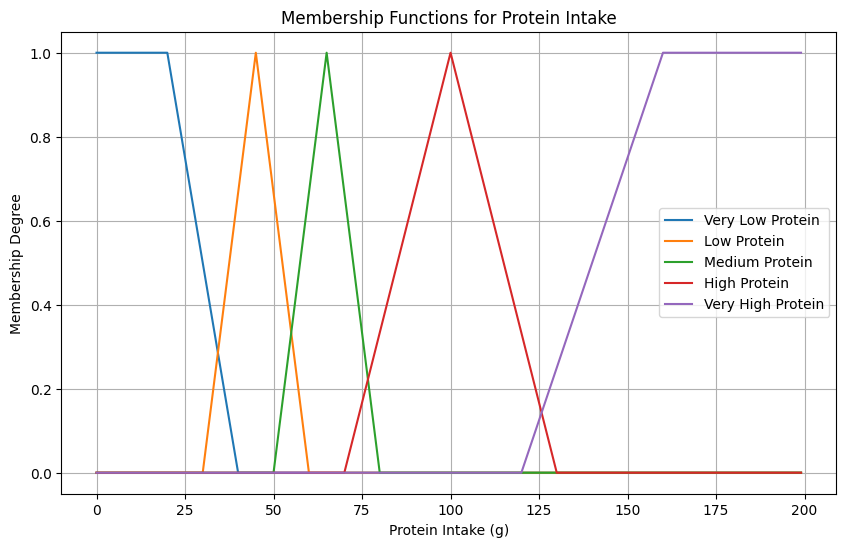

In [78]:
def very_low_protein_mf(protein):
    """
    Trapezoidal (left-shoulder) membership function for very low protein intake.
    Value is 1 up to 20g, then decreases to 0 at 40g.
    """
    vl_b = 20  # Point where it stops being 1 and starts decreasing
    vl_d = 40  # Point where it becomes 0

    if protein <= vl_b:
        return 1.0
    elif vl_b < protein <= vl_d:
        if vl_d == vl_b: # Avoid division by zero, though not expected here
            return 1.0 if protein == vl_b else 0.0
        return (vl_d - protein) / (vl_d - vl_b)
    else: # protein > vl_d
        return 0.0

def low_protein_mf(protein):
    """
    Triangular membership function for low protein intake.
    Centered around 45g (effective 30g-60g).
    """
    # Represents a low protein intake, below or at the lower end of RDA for many adults
    # Example range: centered around 45g (e.g., effective 30g-60g)
    p_low_min = 30
    p_low_peak = 45
    p_low_max = 60

    if protein <= p_low_min or protein >= p_low_max:
        return 0.0
    elif p_low_min < protein <= p_low_peak:
        return (protein - p_low_min) / (p_low_peak - p_low_min)
    elif p_low_peak < protein < p_low_max: # Use < for the second half to avoid issues at peak if step-like needed
        return (p_low_max - protein) / (p_low_max - p_low_peak)
    else: # Should not happen with current logic but good for completeness
        return 0.0

def medium_protein_mf(protein):
    """
    Triangular membership function for medium (adequate) protein intake.
    Centered around 65g (effective 50g-80g), covering typical RDAs.
    """
    # Represents an adequate/medium protein intake, covering typical RDAs for adults (46g-65g)
    # Example range: centered around 65g (e.g., effective 50g-80g)
    p_med_min = 50
    p_med_peak = 65
    p_med_max = 80

    if protein <= p_med_min or protein >= p_med_max:
        return 0.0
    elif p_med_min < protein <= p_med_peak:
        return (protein - p_med_min) / (p_med_peak - p_med_min)
    elif p_med_peak < protein < p_med_max:
        return (p_med_max - protein) / (p_med_max - p_med_peak)
    else:
        return 0.0

def high_protein_mf(protein):
    """
    Triangular membership function for high protein intake.
    Centered around 100g (effective 70g-130g).
    """
    # Represents a high protein intake, above RDA, often for active individuals, within AMDR
    # Example range: centered around 100g (e.g., effective 70g-130g)
    p_high_min = 70
    p_high_peak = 100
    p_high_max = 130

    if protein <= p_high_min or protein >= p_high_max:
        return 0.0
    elif p_high_min < protein <= p_high_peak:
        return (protein - p_high_min) / (p_high_peak - p_high_min)
    elif p_high_peak < protein < p_high_max:
        return (p_high_max - protein) / (p_high_max - p_high_peak)
    else:
        return 0.0

def very_high_protein_mf(protein):
    """
    Trapezoidal (right-shoulder) membership function for very high protein intake.
    Value increases from 0 at 120g to 1 at 160g, then stays 1.
    """
    vh_a = 120  # Point where it starts increasing from 0
    vh_c = 160  # Point where it reaches 1 and stays 1

    if protein < vh_a:
        return 0.0
    elif vh_a <= protein < vh_c:
        if vh_c == vh_a: # Avoid division by zero, though not expected here
            return 0.0 if protein < vh_a else 1.0
        return (protein - vh_a) / (vh_c - vh_a)
    else: # protein >= vh_c
        return 1.0
    
# Plot the membership functions for protein intake
x_protein = np.arange(0, 200, 1)
very_low_protein = [very_low_protein_mf(x) for x in x_protein]
low_protein = [low_protein_mf(x) for x in x_protein]
medium_protein = [medium_protein_mf(x) for x in x_protein]
high_protein = [high_protein_mf(x) for x in x_protein]
very_high_protein = [very_high_protein_mf(x) for x in x_protein]
plt.figure(figsize=(10, 6))
plt.plot(x_protein, very_low_protein, label='Very Low Protein')
plt.plot(x_protein, low_protein, label='Low Protein')
plt.plot(x_protein, medium_protein, label='Medium Protein')
plt.plot(x_protein, high_protein, label='High Protein')
plt.plot(x_protein, very_high_protein, label='Very High Protein')
plt.title('Membership Functions for Protein Intake')
plt.xlabel('Protein Intake (g)')
plt.ylabel('Membership Degree')
plt.legend()
plt.grid(True)
plt.show()


In [79]:
bmi_terms = {
    'underweight': bmi_underweight,
    'normal': bmi_normal,
    'overweight': bmi_overweight,
    'obese': bmi_obese
}

bfm_terms = {
    'essential': bfm_essential,
    'athletes': bfm_athletes,
    'fitness': bfm_fitness,
    'average': bfm_average,
    'obese': bfm_obese
}

bfw_terms = {
    'essential': bfw_essential,
    'athletes': bfw_athletes,
    'fitness': bfw_fitness,
    'average': bfw_average,
    'obese': bfw_obese
}

protein_terms = {
    'low': low_protein_mf,
    'medium': medium_protein_mf,
    'high': high_protein_mf,
    'very_high': very_high_protein_mf,
    'very_low': very_low_protein_mf
}

In [80]:
rules = [
    # BMI: Underweight
    ('underweight', 'essential', 'very_high'),
    ('underweight', 'athletes',  'very_high'),
    ('underweight', 'fitness',   'high'),
    ('underweight', 'average', 'medium'),
    ('underweight', 'obese',     'medium'),

    # BMI: Normal
    ('normal', 'essential', 'high'),
    ('normal', 'athletes',  'high'),
    ('normal', 'fitness',   'medium'),
    ('normal', 'average', 'medium'),
    ('normal', 'obese',     'low'),

    # BMI: Overweight
    ('overweight', 'essential', 'high'),
    ('overweight', 'athletes',  'medium'),
    ('overweight', 'fitness',   'medium'),
    ('overweight', 'average', 'low'),
    ('overweight', 'obese',     'low'),

    # BMI: Obese
    ('obese', 'essential', 'medium'),
    ('obese', 'athletes',  'medium'),
    ('obese', 'fitness',   'low'),
    ('obese', 'average', 'low'),
    ('obese', 'obese',     'very_low')
]

In [81]:
import pandas as pd

def rule_activation_table(bmi, bodyfat, gender):
    # Fuzzify BMI
    bmi_fuzzy = {term: func(bmi) for term, func in bmi_terms.items()}

    # Fuzzify Body Fat Percentage based on gender
    bf_terms = bfm_terms if gender == "M" else bfw_terms
    bodyfat_fuzzy = {term: func(bodyfat) for term, func in bf_terms.items()}

    # Collect rule activations
    rows = []
    for bmi_term, bf_term, protein_term in rules:
        activation = min(bmi_fuzzy[bmi_term], bodyfat_fuzzy[bf_term])
        rows.append({
            "BMI Term": bmi_term,
            "BodyFat Term": bf_term,
            "Protein Score": protein_term.replace('_', ' ').title(),
            "Activation": activation
        })
    df = pd.DataFrame(rows)
    return df

rule_activation_table(27, 26, "F")


,BMI Term,BodyFat Term,Protein Score,Activation
0,underweight,essential,Very High,0.0
1,underweight,athletes,Very High,0.0
2,underweight,fitness,High,0.0
3,underweight,average,Medium,0.0
4,underweight,obese,Medium,0.0
5,normal,essential,High,0.0
6,normal,athletes,High,0.0
7,normal,fitness,Medium,0.0
8,normal,average,Medium,0.6
9,normal,obese,Low,0.0


In [96]:
def clip_membership_function(bmi, bodyfat, gender):
    # Fuzzify BMI and BodyFat
    bmi_fuzzy = {term: func(bmi) for term, func in bmi_terms.items()}
    bf_terms = bfm_terms if gender == "M" else bfw_terms
    bodyfat_fuzzy = {term: func(bodyfat) for term, func in bf_terms.items()}

    # Initialize output membership for each protein term
    output_membership = {term: 0.0 for term in protein_terms}

    # Apply disjunction (max) for each protein output
    for bmi_term, bf_term, protein_term in rules:
        activation = min(bmi_fuzzy[bmi_term], bodyfat_fuzzy[bf_term])
        output_membership[protein_term] = max(output_membership[protein_term], activation)

    return output_membership

clip_membership_function(27, 26, "F")

{'low': 0.4, 'medium': 0.6, 'high': 0.0, 'very_high': 0.0, 'very_low': 0.0}

# 4. Defuzzification (Mamdani)

In [87]:
z_samples = np.arange(5, 205, 10)
z_samples

array([  5,  15,  25,  35,  45,  55,  65,  75,  85,  95, 105, 115, 125,
       135, 145, 155, 165, 175, 185, 195])

In [135]:
def maximize_threshold(z_samples, output_membership):
    """
    For each protein term, clip the membership function at the corresponding threshold (from output_membership).
    Returns a dict of clipped membership values (list) for each protein term over z_samples.
    Also returns a DataFrame for tabular display.
    """
    clipped = {}
    for term, threshold in output_membership.items():
        clipped[term] = [min(protein_terms[term](z), threshold) for z in z_samples]
    df = pd.DataFrame(clipped, index=z_samples)
    return clipped, df

clipped_membership, clipped_df = maximize_threshold(z_samples, clip_membership_function(29, 25, "F"))
clipped_df

,low,medium,high,very_high,very_low
5,0.000000,0.0,0.0,0.0,0.0
15,0.000000,0.0,0.0,0.0,0.0
25,0.000000,0.0,0.0,0.0,0.0
35,0.333333,0.0,0.0,0.0,0.0
45,0.333333,0.0,0.0,0.0,0.0
55,0.333333,0.2,0.0,0.0,0.0
65,0.000000,0.2,0.0,0.0,0.0
75,0.000000,0.2,0.0,0.0,0.0
85,0.000000,0.0,0.0,0.0,0.0
95,0.000000,0.0,0.0,0.0,0.0


In [136]:
clipped_df['Max Membership'] = clipped_df.max(axis=1)
clipped_df

,low,medium,high,very_high,very_low,Max Membership
5,0.000000,0.0,0.0,0.0,0.0,0.000000
15,0.000000,0.0,0.0,0.0,0.0,0.000000
25,0.000000,0.0,0.0,0.0,0.0,0.000000
35,0.333333,0.0,0.0,0.0,0.0,0.333333
45,0.333333,0.0,0.0,0.0,0.0,0.333333
55,0.333333,0.2,0.0,0.0,0.0,0.333333
65,0.000000,0.2,0.0,0.0,0.0,0.200000
75,0.000000,0.2,0.0,0.0,0.0,0.200000
85,0.000000,0.0,0.0,0.0,0.0,0.000000
95,0.000000,0.0,0.0,0.0,0.0,0.000000


In [137]:
# Show tabular format and add a new row for the sum of max membership and sum of zi * max_membership
clipped_df['zi * Max Membership'] = clipped_df.index * clipped_df['Max Membership']

# Calculate the sums
sum_max_membership = clipped_df['Max Membership'].sum()
sum_zi_max_membership = clipped_df['zi * Max Membership'].sum()

# Append the summary row
summary_row = pd.DataFrame(
    {
        'Max Membership': [sum_max_membership],
        'zi * Max Membership': [sum_zi_max_membership]
    },
    index=['Sum']
)

# Display the table with the summary row
display(pd.concat([clipped_df, summary_row]))

,low,medium,high,very_high,very_low,Max Membership,zi * Max Membership
5,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000
15,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000
25,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000
35,0.333333,0.0,0.0,0.0,0.0,0.333333,11.666667
45,0.333333,0.0,0.0,0.0,0.0,0.333333,15.000000
55,0.333333,0.2,0.0,0.0,0.0,0.333333,18.333333
65,0.000000,0.2,0.0,0.0,0.0,0.200000,13.000000
75,0.000000,0.2,0.0,0.0,0.0,0.200000,15.000000
85,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000
95,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000


In [149]:
# crisp output 
crisp_output = sum_zi_max_membership / sum_max_membership if sum_max_membership != 0 else 0
print(f"Crisp Output (Recommended Protein Intake): {crisp_output:.2f}g")

Crisp Output (Recommended Protein Intake): 52.14g


# 4. Defuzzification (Sugeno)

In [139]:
# define constants for output linguistics (very low, low, medium, high, very high)
constants_protein = {
    'very_low': 20,
    'low': 60,
    'medium': 80,
    'high': 130,
    'very_high': 160
}

In [141]:
def crisp_output_sugeno(clip_membership, constants): 
    """
    Calculate the crisp output using the Sugeno method.
    Returns a tuple of (crisp_output, protein_category).
    """
    # Calculate the weighted sum of constants
    weighted_sum = sum(constants[term] * clip_membership[term] for term in clip_membership)
    
    # Calculate the sum of memberships
    sum_memberships = sum(clip_membership.values())
    
    # Avoid division by zero
    if sum_memberships == 0:
        return 0, "Unknown"
    
    # Calculate the crisp output
    crisp_output = weighted_sum / sum_memberships
    return crisp_output

In [150]:
crisp_output_sugeno_result = crisp_output_sugeno(clip_membership_function(29, 25, "F"), constants_protein)
print(f"Crisp Output (Sugeno Method): {crisp_output_sugeno_result:.2f} g")

Crisp Output (Sugeno Method): 67.50 g
